In [1]:
#libraries
import numpy as np 
import pandas as pd

import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# visulization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# this function builds the data set for part A of the assighnment
def build_data_partA(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if y > 1 then the value is 1
        if y[i] > 1:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df

In [3]:
# this function builds the data set for part B of the assighnment
def build_data_partB(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(700):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    for i in range(700,1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-300, 300)
        randY = random.randint(-300, 300)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


In [4]:
# this function plots the values of the actual values of the data compared to the prediction values we predicted
def plotting_test(test):
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")

    for index, row in test.iterrows():
        if row['value'] == 1:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
        if row['pred'] == 1:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

def plotting_train(train):
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

In [5]:
# this function plots the confussion matrix
def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [6]:
# we got good results with 5,2
# 4
# 4 2 1

In [7]:
clf = MLPClassifier(solver='lbfgs', alpha=0.1,hidden_layer_sizes=(4,2,1), random_state=1)

In [8]:
train = build_data_partA(1)
first_test = build_data_partA(9)
second_test = build_data_partA(8)
train.head()

,x,y,value
0,-55.98,86.51,1
1,-79.33,-16.42,-1
2,-61.37,62.34,1
3,47.28,54.74,1
4,24.39,-31.21,-1


In [9]:
train_x=train[["x","y"]]
print(train_x.head())
train_y=train[["value"]]
print(train_y.head())

       x      y
0 -55.98  86.51
1 -79.33 -16.42
2 -61.37  62.34
3  47.28  54.74
4  24.39 -31.21
   value
0      1
1     -1
2      1
3      1
4     -1


In [10]:
clf.fit(train_x, train_y)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(4, 2, 1), random_state=1,
              solver='lbfgs')

In [11]:
test_x=first_test[["x","y"]]
test_y=first_test[["value"]]

In [12]:
predicted=clf.predict(test_x)
first_test["pred"]=predicted
first_test.head()

,x,y,value,pred
0,51.71,22.32,1,1
1,-12.47,-54.61,-1,-1
2,-39.01,-97.90,-1,-1
3,10.86,64.75,1,1
4,51.95,98.14,1,1


In [13]:
con_mat = confusion_matrix(predicted,test_y )

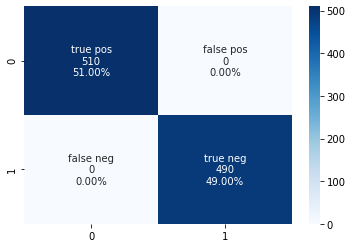

In [14]:
confussion_matrix(con_mat)

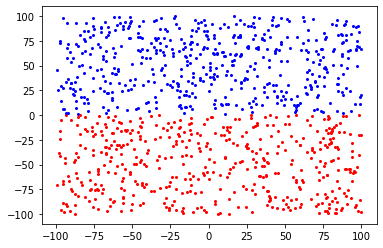

In [15]:
plotting_train(train)

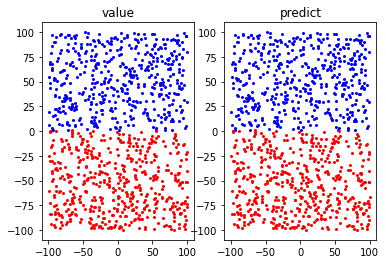

In [16]:
plotting_test(first_test)

In [17]:
for coef in clf.coefs_:
    print(coef,"\n")

[[-0.92212934 -0.90486696 -0.42130545  0.00799914]
 [ 0.34054503 -0.55213743  0.13596863 -1.36428869]] 

[[-0.02879417  0.31007459]
 [-0.04545546 -0.43007705]
 [ 0.01708001  0.22453557]
 [-0.03503582 -1.67320253]] 

[[-0.55017596]
 [ 2.37912427]] 

[[2.04193008]] 



In [18]:
for b in clf.intercepts_:
    print(b,"\n")

[-0.56470735  1.17015795 -0.2788894   2.17545959] 

[-1.76557857  4.71483979] 

[-0.13328276] 

[-12.78606745] 



In [19]:
# def lookin1(test ,weight,bias):
# #      for x in range (len (layers)-1):
# #         weights=[]
# #         for i in range(0,len(w[x])):
# #             for j in range(0,layers[x]):
# #                 weights.append(w[x][i][j])
# #                 bias=b[x][i]
# #             print("weights ", weights, " bias ", bias)
#         new=test.copy()                
#         count = 0
#         pred = []
#         predictionlist=[]
#         # for each row we use the activation formula with the weights and bias we returned
#         # in the fit function to predict on the test data set
#         for index, row in test.iterrows():
#             prediction = bias + (row['x'] * weight[0]) + (row['y'] * weight[1])
#             predictionlist.append(prediction)
#             if prediction > 0:
#                 prediction = 1
#             else:
#                 prediction = -1
#             pred.append(prediction)

#             if prediction == row['value']:
#                 count += 1
#         # now add the prediction list to the data set in order to make comparison 
#         test['pred'] = pred
        
#         plotting_test(test)
#         return predictionlist

In [20]:
# testa = build_data_partA(9)
# layers=(2,4,2,1,1)
# w=clf.coefs_
# b=clf.intercepts_
# lookin(testa, w,b)

In [21]:
def lookin2(test,lastlayers, weight,bias):              
    count = 0
    rlist=[]
#         pred2 = []
    # for each row we use the activation formula with the weights and bias we returned
    # in the fit function to predict on the test data set
    for k in range(len(bias)):
        pred1 = []
        predictionlist=[]
        for j in range(len(test)):
            prediction=0
            for i in range(len(lastlayers)):
#                         print(k,i,j)
                prediction =prediction+ bias[k] + (lastlayers[i][j] * weight[i][k])
#                     print(prediction)
            predictionlist.append(prediction)
            if prediction > 0:
                prediction = 1
            else:
                prediction = -1
#                     if(k==0):
            pred1.append(prediction)
#                     else:
#                         pred2.append(prediction)
    # now add the prediction list to the data set in order to make comparison
        rlist.append(predictionlist)
        test1=test.copy()
        test1['pred']=pred1
        plotting_test(test1)
#         test2=test.copy()
#         test2['pred']=pred2
#         plotting_test(test2)
        
    return rlist    

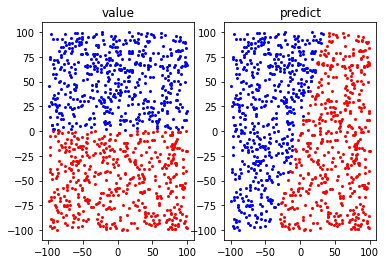

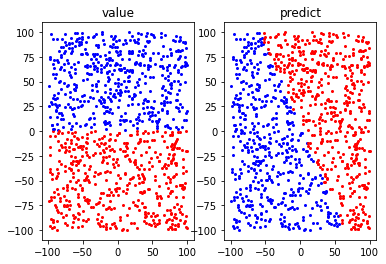

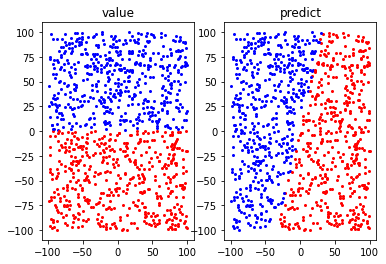

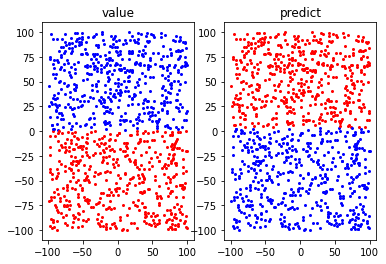

In [22]:
traina = build_data_partA(1)
weight=clf.coefs_[0]
bias=clf.intercepts_[0]
listx=[]
listy=[]
for index, row in traina.iterrows():
    listx.append(row["x"])
    listy.append(row["y"])
listt=[listx,listy]
list1=(lookin2(traina,listt,weight,bias))

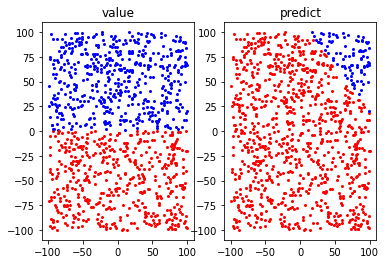

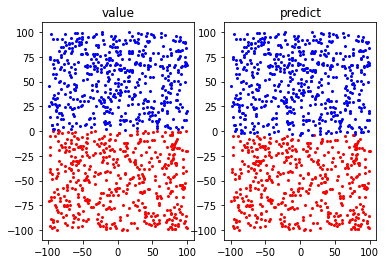

In [23]:
traina = build_data_partA(1)
weight=clf.coefs_[1]
bias=clf.intercepts_[1]
list2=(lookin2(traina,list1,weight,bias))

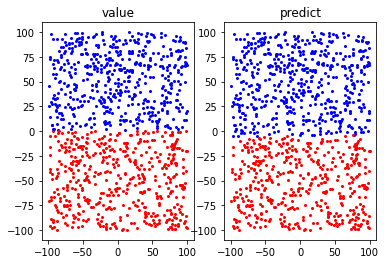

In [24]:
traina = build_data_partA(1)
weight=clf.coefs_[2]
bias=clf.intercepts_[2]
list3=(lookin2(traina,list2,weight,bias))

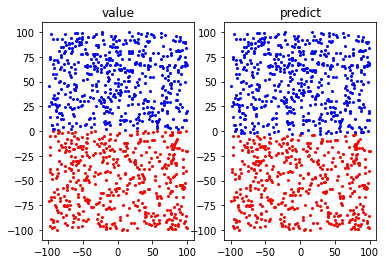

[[1159.0021745507236, -159.56602216641005, 849.3678406111657, 741.9976201148235, -358.74334642000474, 818.2619357181367, 407.9520698022906, 1310.904274244286, 642.3822203476498, -276.20956990419063, -817.961549903088, -1110.9676869522636, -1123.8806192514944, -1207.570263802557, -330.8191167157241, -1120.6226861624923, -313.74358339940324, 841.3969769029403, -266.6344089217127, -269.71460608833416, 695.7341297682161, -1148.382016251346, 1096.9922025736937, -451.539531114067, -730.6759123384494, 865.566331391958, 891.9065021054676, 39.652030530390306, 1231.791508661661, 879.4733905136371, 1234.576561637571, 787.9479793251403, 462.3975752994574, -515.0287636664085, 1066.3734724331919, -877.7361738850224, 894.485222238336, -545.0561278960041, 407.80916619433924, 817.7370365761152, 742.1602442185825, 65.68656113741156, 1183.087349710761, -525.5757637141361, 876.4741489777298, -1185.1354274054413, 1032.7340144790578, -270.3485311038716, 917.9643085297643, 1188.9592656459854, 689.68374895243

In [25]:
traina = build_data_partA(1)
weight=clf.coefs_[3]
bias=clf.intercepts_[3]
list4=(lookin2(traina,list3,weight,bias))
print(list4)

In [26]:
trainb = build_data_partB(1)
first_testb = build_data_partB(9)
second_testb = build_data_partB(8)
trainb.head()

,x,y,value
0,-55.98,86.51,-1
1,-79.33,-16.42,-1
2,-61.37,62.34,-1
3,47.28,54.74,-1
4,24.39,-31.21,-1


In [27]:
train_xb=trainb[["x","y"]]
print(train_xb.head())
train_yb=trainb[["value"]]
print(train_yb.head())

       x      y
0 -55.98  86.51
1 -79.33 -16.42
2 -61.37  62.34
3  47.28  54.74
4  24.39 -31.21
   value
0     -1
1     -1
2     -1
3     -1
4     -1


In [28]:
clf.fit(train_xb, train_yb)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(4, 2, 1), random_state=1,
              solver='lbfgs')

In [29]:
test_xb=first_testb[["x","y"]]
test_yb=first_testb[["value"]]

In [30]:
predictedb=clf.predict(test_xb)
first_testb["pred"]=predictedb
first_testb.head()

,x,y,value,pred
0,51.71,22.32,-1,-1
1,-12.47,-54.61,-1,-1
2,-39.01,-97.90,-1,-1
3,10.86,64.75,-1,-1
4,51.95,98.14,-1,-1


In [31]:
con_matb = confusion_matrix(predictedb,test_yb )

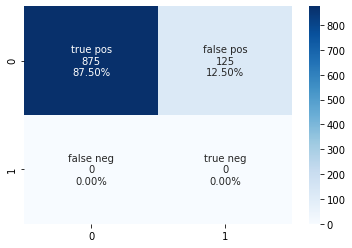

In [32]:
confussion_matrix(con_matb)

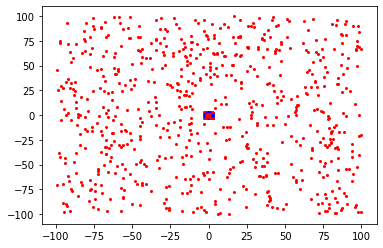

In [33]:
plotting_train(trainb)

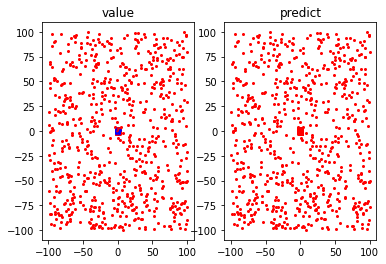

In [34]:
plotting_test(first_testb)